In [51]:
import pandas as pd

In [52]:
train_df=pd.read_csv('data set/uci-news-aggregator.csv')

In [53]:
train_df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [54]:
train_df.shape

(422419, 8)

In [55]:
train_df.describe()

,ID,TIMESTAMP
count,422419.000000,4.224190e+05
mean,211536.764594,1.400445e+12
std,122102.839707,3.733088e+09
min,1.000000,1.394470e+12
25%,105801.500000,1.397349e+12
50%,211655.000000,1.399990e+12
75%,317273.500000,1.403775e+12
max,422937.000000,1.409229e+12


In [56]:
train_df.isnull().sum()

ID           0
TITLE        0
URL          0
PUBLISHER    2
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
dtype: int64

In [57]:
train_df['CATEGORY'].unique()

array(['b', 't', 'e', 'm'], dtype=object)

In [58]:
train_df['CATEGORY'].value_counts()

e    152469
b    115967
t    108344
m     45639
Name: CATEGORY, dtype: int64

# Data Preprocessing

In [59]:
pre_df=train_df.copy()

In [60]:
pre_df.head(2)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207


In [61]:
pre_df['TITLE'][0]

'Fed official says weak data caused by weather, should not slow taper'

In [62]:
# We don't need all cols.
pre_df.drop(['ID', 'URL','PUBLISHER','STORY','HOSTNAME','TIMESTAMP'], axis=1, inplace=True)

In [63]:
# Preprocessing of title

In [64]:
#shuffling rows with the help of sample, here (frac = 1) means return all rows
pre_df = pre_df.sample(frac=1).reset_index(drop=True)
pre_df.head()

,TITLE,CATEGORY
0,Singer Chris Brown's bodyguard convicted of as...,e
1,Samsung Galaxy Tab S Thinness Comparison,t
2,Rihanna Stays Silent After Ex-Boyfriends Drake...,e
3,Credit Suisse Said Near U.S. Tax Deal for Over...,b
4,Oil Futures Post Weekly Gain on Shrinking Cush...,b


In [65]:
title=pre_df['TITLE']

In [66]:
title.head()

0    Singer Chris Brown's bodyguard convicted of as...
1             Samsung Galaxy Tab S Thinness Comparison
2    Rihanna Stays Silent After Ex-Boyfriends Drake...
3    Credit Suisse Said Near U.S. Tax Deal for Over...
4    Oil Futures Post Weekly Gain on Shrinking Cush...
Name: TITLE, dtype: object

In [67]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))
word_stemmer = PorterStemmer()

In [96]:
def text_preprocessing(data_df):
    title_corpus=[]
    for i in range(0, len(data_df)):
    #     Remove all characters other than letters.
        first_cut_title=re.sub('[^a-zA-Z]', ' ',data_df[i])
    #     break
        word_tokens = word_tokenize(first_cut_title)
        filtered_sentence = [word_stemmer(w) for w in word_tokens if not w.lower() in stop_words]
        filtered_sentence = []
        for w in word_tokens:
            if w not in stop_words:
                filtered_sentence.append(w)
        filtered_sentence=' '.join(filtered_sentence)
        title_corpus.append(filtered_sentence)
    return title_corpus

In [69]:
corpus=text_preprocessing(title)

In [70]:
corpus[2]

'Rihanna Stays Silent After Ex Boyfriends Drake Chris Brown Collaborate'

# Converting processed title into vector

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1, 3))

In [72]:
X=vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names())
# print(X.shape)

In [73]:
# vectorizer.get_feature_names()

In [74]:
X.shape

(422419, 5000)

In [75]:
category=pre_df['CATEGORY']

In [76]:
category.head(3)

0    e
1    t
2    e
Name: CATEGORY, dtype: object

In [77]:
category.unique()

array(['e', 't', 'b', 'm'], dtype=object)

In [78]:
# there are 5 types of categories. These are ordered values. So we can use Label encoding
category.replace({"b": 0, "t": 1, "e": 2, "m": 3}, inplace = True)

In [79]:
y=category

In [80]:
y.head(3)

0    2
1    1
2    2
Name: CATEGORY, dtype: int64

# Model Creation

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((295693, 5000), (126726, 5000), (295693,), (126726,))

In [84]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [85]:
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [86]:
pred=model.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
score=accuracy_score(y_test, pred)

In [89]:
score

0.892224168678882

In [90]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[30316,  2951,  1069,   435],
       [ 2721, 27986,  1194,   392],
       [  897,  1103, 43728,   279],
       [ 1081,   622,   914, 11038]], dtype=int64)

In [91]:
X_test[1]

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

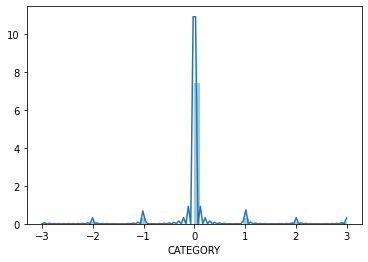

In [93]:
sns.distplot(y_test-pred)
plt.show()

In [1]:
# plt.scatter(y_test, pred, alpha = 0.5)
# plt.xlabel("y_test")
# plt.ylabel("y_pred")
# plt.show()

# Saving the models (Prediction and tfidf)

In [95]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(model, 'news_classifier_MnGB.pkl')
joblib.dump(vectorizer, 'news_classifier_tfidf.pkl')

['news_classifier_tfidf.pkl']